<hr style="border:2px solid gray"> </hr>

# Homework 1 - Traveling Salesman Problem

## Example Code

### Algorithm 3: Simulated Annealing

### Author: Wangduk Seo (CAU AI Lab)
<hr style="border:2px solid gray"> </hr>

# Step 0. Importing packages and Global Settings

In [1]:
# package list
import tkinter as tk
from tkinter import filedialog
import numpy as np
import sys
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import time

# Global Variables
# Simulated Annealing
TEMPERATURE = 100000
COOLING_RATIO = 0.90
SUB_STEPS = 500
np.random.seed(0)

# Plot Settings
PLOT_MODE = True # Draw Route
PLT_INTERVAL = 100 # Draw Route every 100 iterations
plt.ion()

# First City Index
FIRST_IDX = 0

# Step 1. Data Loading

In [2]:
def fileloader():
    # Data loading
    root = tk.Tk()
    root.withdraw()

    file_path = filedialog.askopenfilename()
    if file_path == '':
        raise Exception('Cannot load a data file')
    root.destroy()
    #     Data Format
    #     ---------------------------------------------------------
    #     NAME : pia3056
    #     COMMENT : Bonn VLSI data set with 3056 points
    #     COMMENT : Uni Bonn, Research Institute for Discrete Math
    #     COMMENT : Contributed by Andre Rohe
    #     TYPE : TSP
    #     DIMENSION : 3056 -----------------------------|
    #     EDGE_WEIGHT_TYPE : EUC_2D                     |
    #     NODE_COORD_SECTION                            |
    #     1 0 11 (2 dimentional coordinate of city)     |
    #     2 0 115                                       |
    #     ...                                           |
    #     ...(Total 3056 nodes)<------------------------|
    #     EOF
    #     ---------------------------------------------------------
    with open(file_path, "r") as file:
        file_str = file.readlines()

    # Get the coordinates of cities
    coord_str = file_str[8:-1]  # first city string to last city string (EOF 전까지)
    coord_list = np.zeros((len(coord_str), 2))
    for idx, item in enumerate(coord_str):
        coord_split = item.split()
        coord_list[idx, 0] = int(coord_split[1])
        coord_list[idx, 1] = int(coord_split[2])

    return coord_list

# Step 2. Initialization

In [3]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int)
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path


def initialize_random(coord_list, first_idx):
    cnt_cities = len(coord_list)
    path = np.zeros(cnt_cities + 1, dtype=np.int)

    path[0], path[-1] = first_idx, first_idx
    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    # city indices without first city index
    cities_tovisit = np.delete(np.arange(cnt_cities), first_idx)
    cities_random = np.random.permutation(cities_tovisit)
    path[1:-1] = cities_random

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

# Step 3. Searching a path

## Algorithm 3. SA (2-opt search)

In [4]:
def two_opt_swap(path_map, path, steps):
    cnt_cities = path_map.shape[0]
    best_cost = float('inf')
    for i in range(steps):
        curr_path = path.copy()
        # Select two indices for flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))
        if sel_idx[1] - sel_idx[0] <= 1:
            continue
        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)
        curr_cost = cost_arr.sum()
        if curr_cost < best_cost:
            best_path = curr_path.copy()
            best_cost = curr_cost

    return best_path, best_cost

In [5]:
def simulated_annealing(path_map, path):
    best_path = path.copy()
    best_cost = path_cost(path_map, best_path).sum()

    global TEMPERATURE
    while TEMPERATURE > 1:
        curr_path = best_path.copy()
        new_path, new_cost = two_opt_swap(path_map, curr_path, SUB_STEPS)

        if new_cost < best_cost:
            best_path = new_path
            best_cost = new_cost
        else:
            prob = np.exp(-(new_cost - best_cost) / float(TEMPERATURE))
            if prob > np.random.rand(1):
                best_path = new_path
                best_cost = new_cost
            TEMPERATURE = TEMPERATURE * COOLING_RATIO

    return best_path, best_cost

# Main

Execution Time: 45.73391652107239
Path: [0, 6, 7, 1, 2, 8, 9, 3, 10, 23, 22, 37, 38, 39, 40, 41, 42, 43, 60, 59, 58, 57, 56, 51, 49, 48, 46, 47, 54, 53, 45, 44, 52, 73, 88, 92, 97, 111, 122, 129, 120, 117, 113, 104, 99, 100, 101, 105, 106, 107, 112, 123, 124, 125, 130, 126, 127, 128, 121, 116, 119, 115, 118, 114, 108, 109, 110, 102, 103, 95, 96, 94, 90, 89, 72, 71, 79, 84, 85, 83, 78, 82, 87, 91, 93, 98, 86, 81, 80, 77, 76, 67, 63, 74, 61, 64, 68, 69, 65, 70, 75, 66, 62, 55, 50, 33, 34, 35, 36, 21, 20, 32, 31, 30, 19, 29, 28, 27, 26, 18, 25, 24, 17, 12, 4, 11, 14, 16, 15, 13, 5, 0]
Cost: 598.190793574051


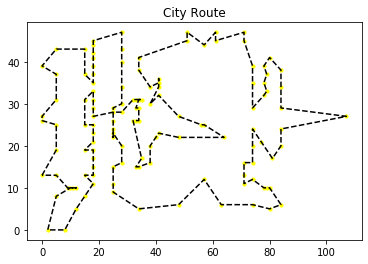

In [6]:
# Initialization ###############
initialize = initialize_greedy
#initialize = initialize_random
################################

# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()
# Step 2
path_map, path = initialize(coord_list, FIRST_IDX)

# Step 3
best_path, best_cost = simulated_annealing(path_map, path)

if PLOT_MODE:
    figure, ax = plt.subplots()
    plt.scatter(coord_list[:, 0], coord_list[:, 1], c='yellow', s=10)
    plt.title('City Route')
    coord_path = coord_list
    coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
    coord_path[:, :] = coord_path[best_path, :]
    lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
    figure.canvas.draw()

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))